# Upper confidence bound

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# importing dataset

datasheet = pd.read_csv('Ads_CTR_Optimisation.csv')

In [13]:
# implementing the UCB

import math
N = 500
d = 10
ads_selected = []
numbers_of_selections = [0]*d
sums_of_rewards = [0] * d
total_reward = 0

for n in range(0, N):
    ads = 0
    max_upper_bound = 0
    for i in range(0,d):
        if numbers_of_selections[i] > 0:
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1)/numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if (upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = datasheet.values[n, ad]
    sums_of_rewards[ad] += reward
    total_reward += reward

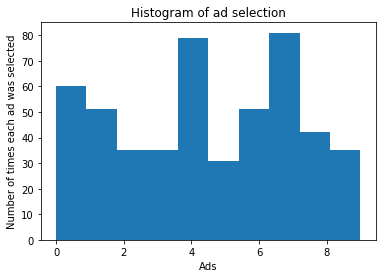

In [14]:
# Visualizing the Results

plt.hist(ads_selected)
plt.title('Histogram of ad selection')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()